# <center><font color='blue'>EDA for Dataset 2 (step 7-10)</font></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read cleaned dataset
data = pd.read_csv("../data/cleaned_stroke.csv")

In [3]:
# Check column types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   int64  
 2   hypertension       5109 non-null   object 
 3   heart_disease      5109 non-null   object 
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   object 
 11  bmi_category       5109 non-null   object 
 12  diabetes_category  5109 non-null   object 
 13  age_group          5109 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 558.9+ KB


## <font color='red'>Step 6: Statistics Summary</font>

### <font color='blue'>1. statistial summary of all data</font>

In [4]:
# numerical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5109.0,43.218634,22.634799,0.00,25.00,45.00,61.00,82.00
avg_glucose_level,5109.0,106.140399,45.285004,55.12,77.24,91.88,114.09,271.74
bmi,5109.0,28.863300,7.699785,10.30,23.80,28.10,32.80,97.60


#### Key Insights:
#### -age has a mean around 45, indicating an average person in their early 40s.
#### -BMI has a mean around 28.10, indicating an average around the "overweight" weight range.
#### -avg glucose level has a mean around 91.88 indicating an average around the "normal" glucose range.

In [5]:
# numerical + categorical summary
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,5109,2,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5109.0,NaN,NaN,NaN,43.218634,22.634799,0.0,25.0,45.0,61.0,82.0
hypertension,5109,2,No,4611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heart_disease,5109,2,No,4833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ever_married,5109,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,5109,5,Private,2924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residence_type,5109,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,5109.0,NaN,NaN,NaN,106.140399,45.285004,55.12,77.24,91.88,114.09,271.74
bmi,5109.0,NaN,NaN,NaN,28.8633,7.699785,10.3,23.8,28.1,32.8,97.6
smoking_status,5109,3,Non-Smoker,1892,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <font color='blue'>2. numerical features summary</font>

In [6]:
# Summary statistics of numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    print(f"\nValue counts for {col}:{data[col].value_counts()}")


Value counts for age:age
78    102
57     95
52     90
54     87
51     86
     ... 
11     36
10     35
4      34
7      32
6      24
Name: count, Length: 83, dtype: int64

Value counts for avg_glucose_level:avg_glucose_level
93.88     6
73.00     5
72.49     5
91.85     5
91.68     5
         ..
91.01     1
120.03    1
167.41    1
214.09    1
219.84    1
Name: count, Length: 3978, dtype: int64

Value counts for bmi:bmi
28.1    230
28.7     41
28.4     38
27.7     37
26.1     37
       ... 
47.9      1
13.0      1
13.9      1
54.1      1
14.9      1
Name: count, Length: 418, dtype: int64


### <font color='blue'>3. category features summary</font>

In [7]:
# Summary statistics of categorical columns
categorical_cols = data.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"--- {col} ---")
    print(data[col].value_counts(normalize=True) * 100)
    print("\n")

--- gender ---
gender
Female    58.602466
Male      41.397534
Name: proportion, dtype: float64


--- hypertension ---
hypertension
No     90.252496
Yes     9.747504
Name: proportion, dtype: float64


--- heart_disease ---
heart_disease
No     94.597769
Yes     5.402231
Name: proportion, dtype: float64


--- ever_married ---
ever_married
Yes    65.629282
No     34.370718
Name: proportion, dtype: float64


--- work_type ---
work_type
Private          57.232335
Self-employed    16.030534
Children         13.446858
Government       12.859659
Unemployed        0.430613
Name: proportion, dtype: float64


--- residence_type ---
residence_type
Urban    50.812292
Rural    49.187708
Name: proportion, dtype: float64


--- smoking_status ---
smoking_status
Non-Smoker    37.032687
Smoker        32.746134
Unknown       30.221178
Name: proportion, dtype: float64


--- stroke ---
stroke
No     95.126248
Yes     4.873752
Name: proportion, dtype: float64


--- bmi_category ---
bmi_category
Obese        

## <font color='red'>Step 8: EDA Univariate Analysis</font>

### <font color='blue'>1. univariate analysis for numerical features</font>

Skew : -0.14


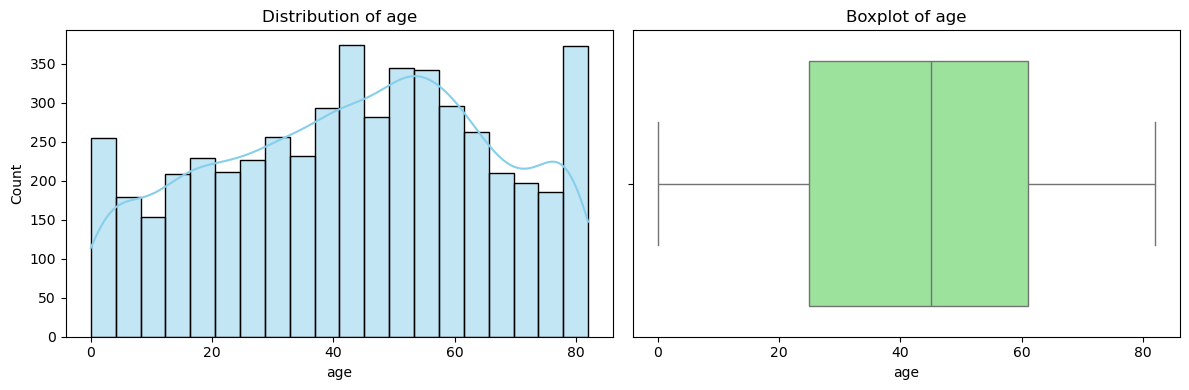

Skew : 1.57


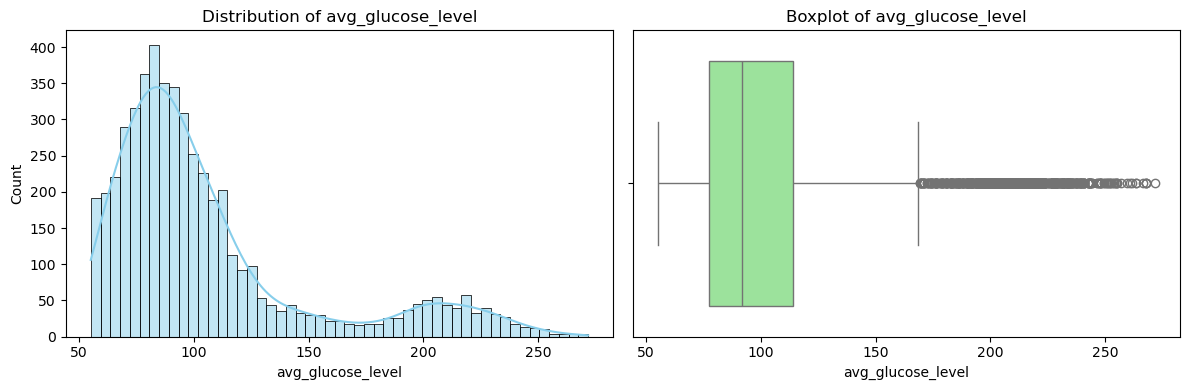

Skew : 1.09


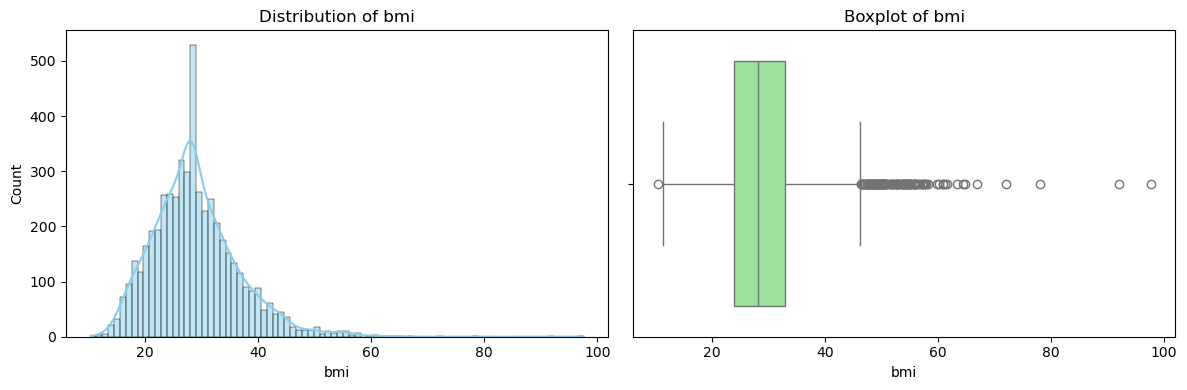

In [8]:
# =========================
# Visualize Distribution of Numerical Columns
# =========================
for col in numerical_cols:
    print('Skew :', round(data[col].skew(), 2))
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram with KDE
    sns.histplot(data[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {col}')

    # Boxplot
    sns.boxplot(x=data[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

### <font color='blue'>2. univariate analysis for categorical features</font>

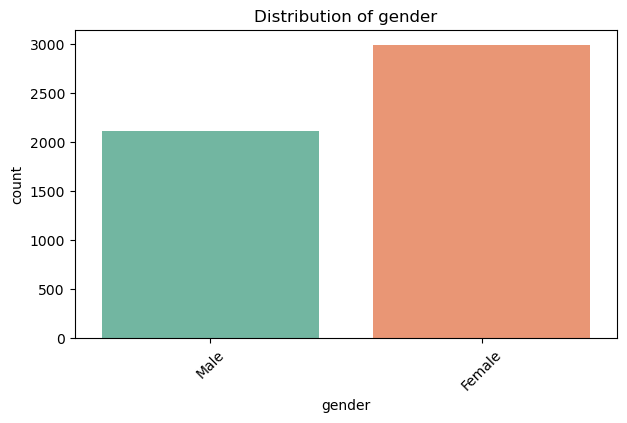

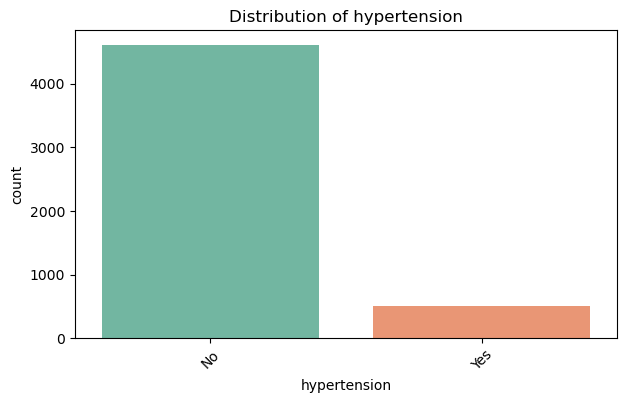

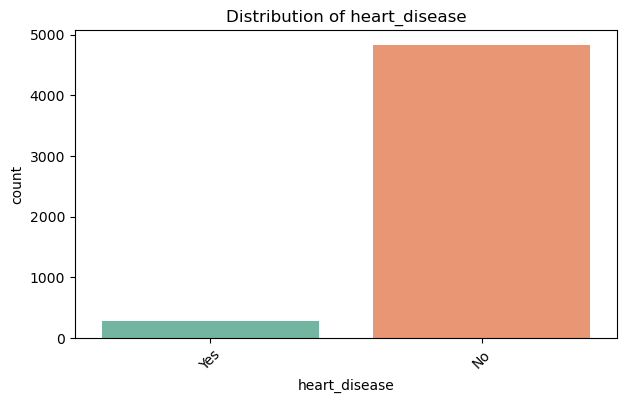

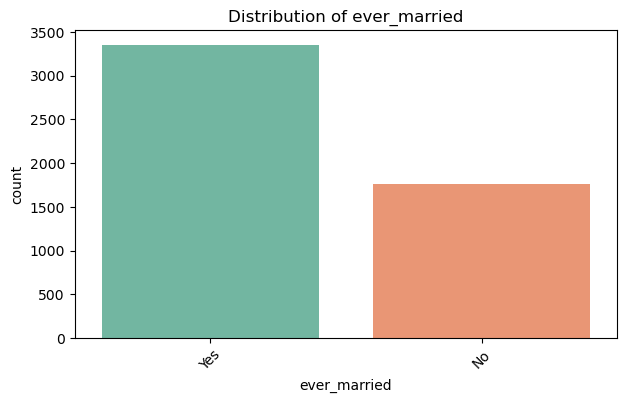

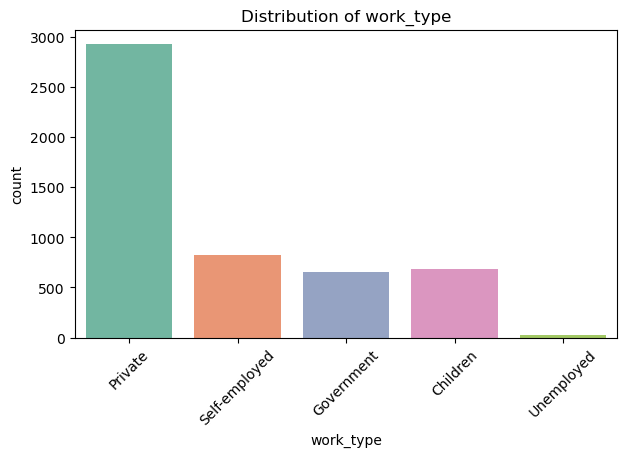

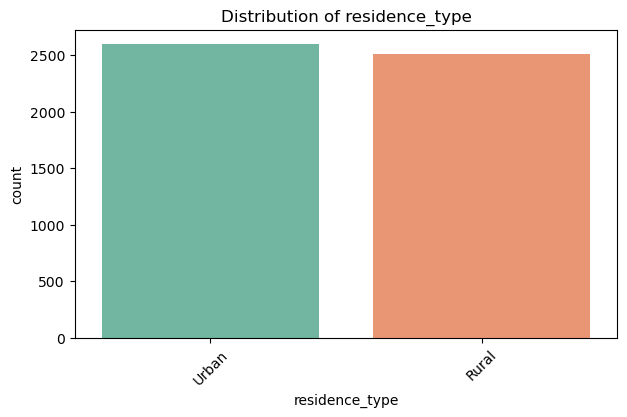

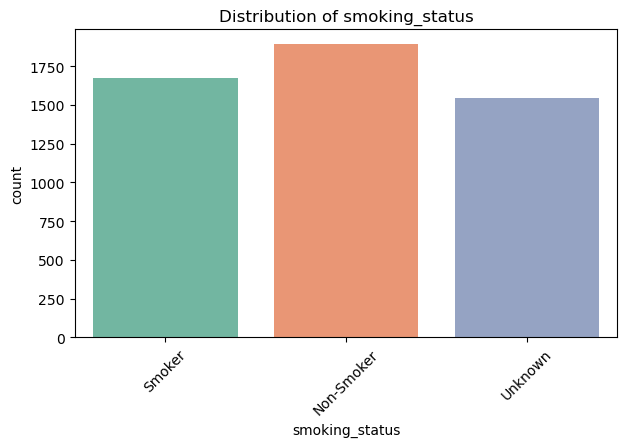

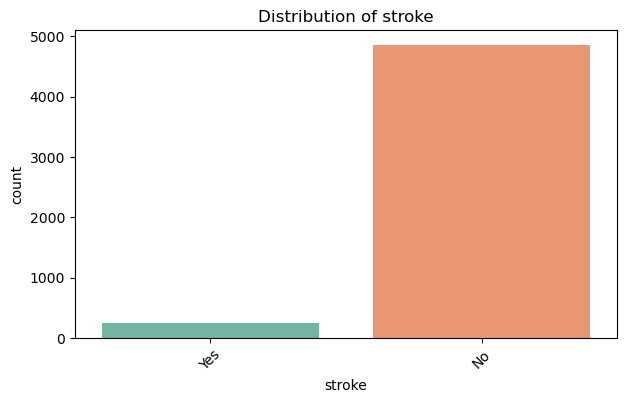

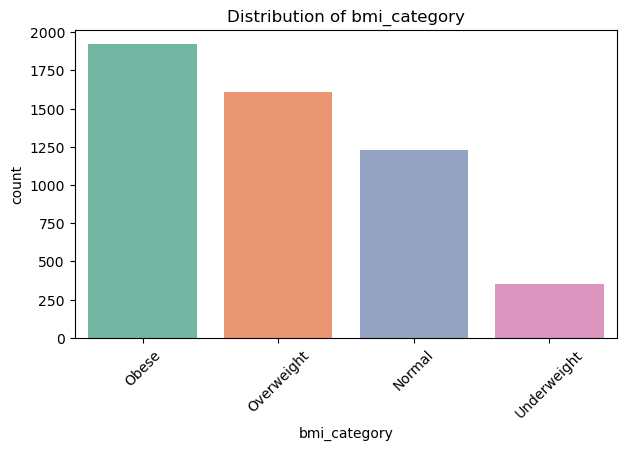

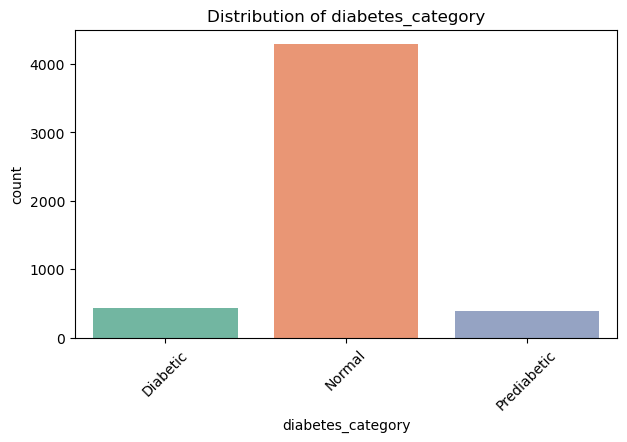

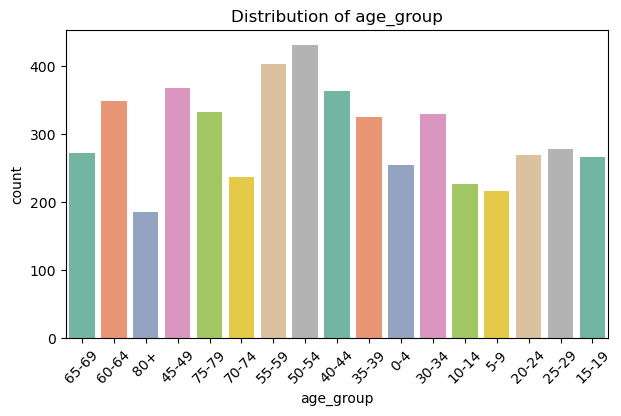

In [9]:
# =========================
# Visualize Distribution of Numerical Columns
# =========================

# bar view
for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=data, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

### <font color='blue'>3. check skewness for all numerical columns</font>

In [10]:
skewed_features = data[numerical_cols].skew().sort_values(ascending=False)
print(skewed_features)

avg_glucose_level    1.572815
bmi                  1.087929
age                 -0.140796
dtype: float64


### <font color='blue'>4. apply log1p transformation to highly skewed columns</font>

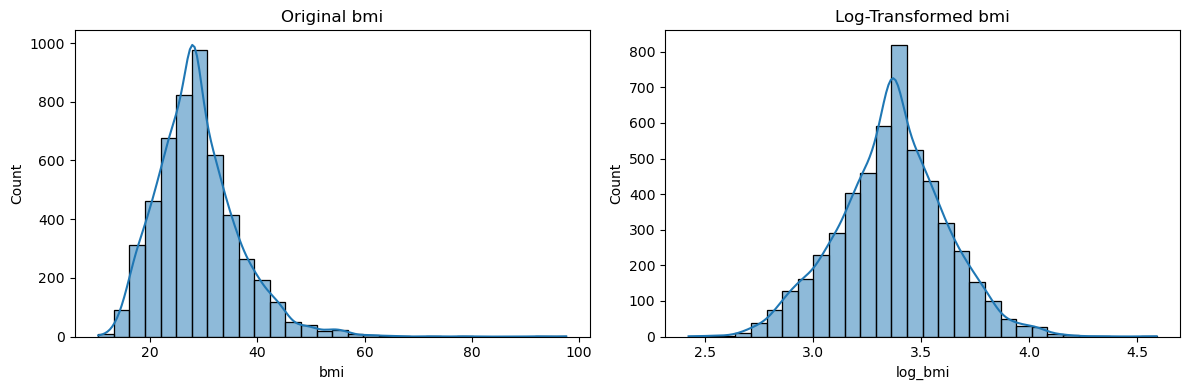

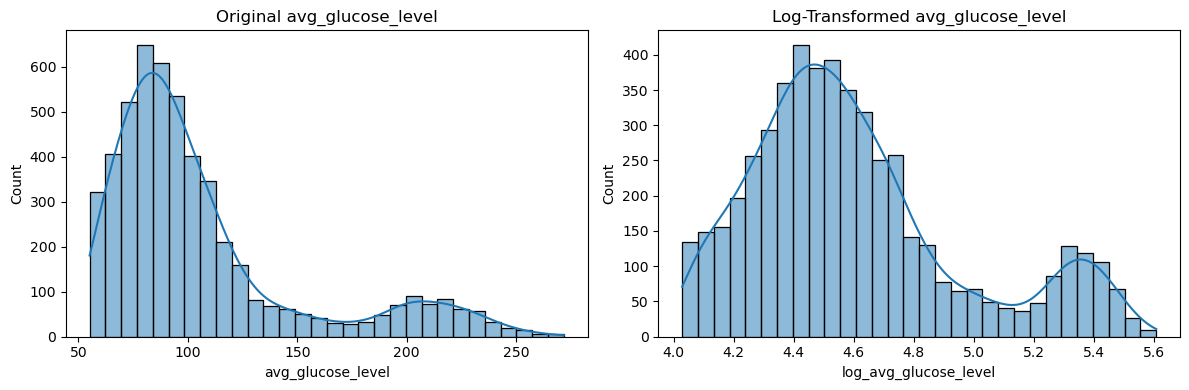

In [11]:
# Apply log1p transformation to highly skewed columns > 1
cols_to_transform = [
    'bmi', 'avg_glucose_level'
]

for col in cols_to_transform:
    data[f'log_{col}'] = np.log1p(data[col])  # creates new transformed column

# display before & after log
for col in cols_to_transform:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(data[col], bins=30, ax=axes[0], kde=True)
    axes[0].set_title(f'Original {col}')
    
    sns.histplot(data[f'log_{col}'], bins=30, ax=axes[1], kde=True)
    axes[1].set_title(f'Log-Transformed {col}')
    
    plt.tight_layout()
    plt.show()

### <font color='blue'>5. keep log and remove original one</font>

In [12]:
# Remove original skewed columns and add log-transformed ones
for col in cols_to_transform:
    original = col
    transformed = f'log_{col}'
    
    if original in numerical_cols:
        numerical_cols.remove(original)  # Remove original
    
    if transformed not in numerical_cols:
        numerical_cols.append(transformed)  # Add log-transformed

print("Updated numerical columns:")
print(numerical_cols)

Updated numerical columns:
['age', 'log_bmi', 'log_avg_glucose_level']


## <font color='red'>Step 9: EDA Bivariate Analysis</font>

### <font color='blue'>1. Target vs Numerical Features</font>

Correlation of Numerical Features with Stroke:
age                      0.245109
log_avg_glucose_level    0.117239
log_bmi                  0.050041
dtype: float64


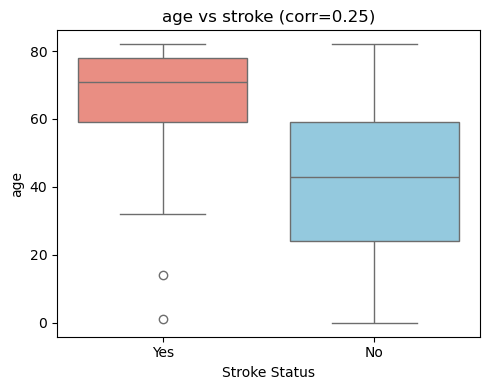

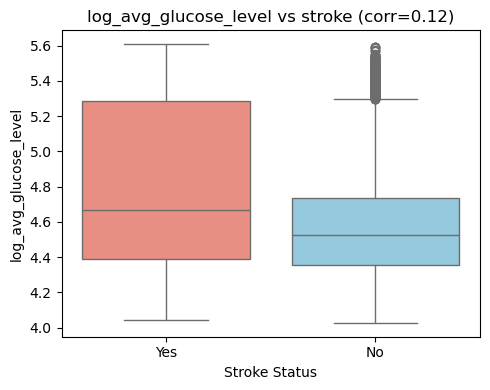

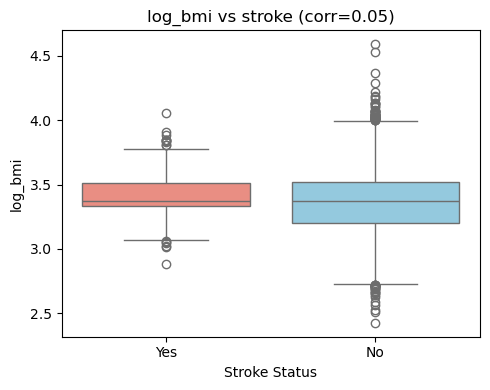

In [13]:
# Set target
target = 'stroke'

# Convert stroke to binary numeric (Yes=1, No=0)
data[target] = data[target].astype('category').cat.codes

# ==========================================================
# Compute Correlation Between Target and All Numerical Features
# ==========================================================

# Calculate correlation values for all numeric predictors
corr_with_target = (
    data[numerical_cols]
    .corrwith(data[target])        # compute correlation
    .dropna()                      # remove any NaN results
    .sort_values(ascending=False)  # sort highest → lowest
)

# Display full correlation list
print("Correlation of Numerical Features with Stroke:")
print(corr_with_target)

# ==========================================================
# Visualize Correlation Between Target and Numerical Features
# ==========================================================

# Convert binary-coded stroke back to labels for visualization
data[target] = data[target].map({0: 'No', 1: 'Yes'})

# Define custom colors
palette = {'No': 'skyblue', 'Yes': 'salmon'}

# Display stroke vs numerical features box plots
for feature in corr_with_target.index:
    plt.figure(figsize=(5, 4))
    sns.boxplot(data=data, x=target, y=feature, palette=palette)
    plt.title(f'{feature} vs {target} (corr={corr_with_target[feature]:.2f})')
    plt.ylabel(feature)
    plt.xlabel("Stroke Status")
    plt.tight_layout()
    plt.show()

### <font color='blue'>2. Target vs Categorical Features</font>


=== Categorical features ranked by Cramér’s V (strength only) ===
          Feature  Cramér's V
        age_group    0.286755
diabetes_category    0.134906
    heart_disease    0.132894
     hypertension    0.126359
     ever_married    0.107342
        work_type    0.098092
     bmi_category    0.093698
   smoking_status    0.067341
   residence_type    0.014505
           gender    0.008158


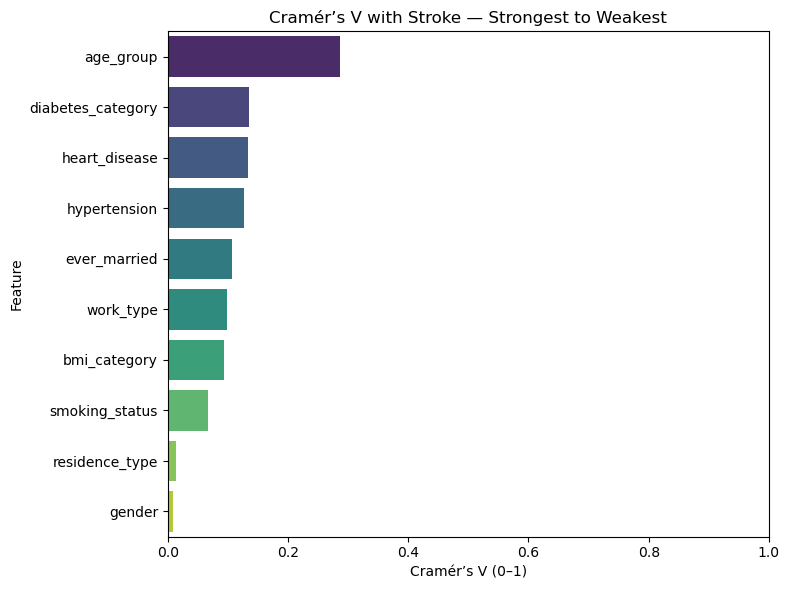

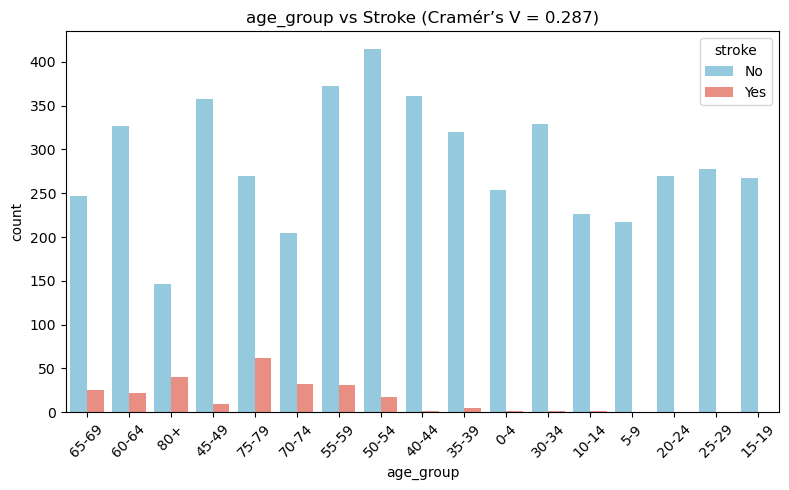

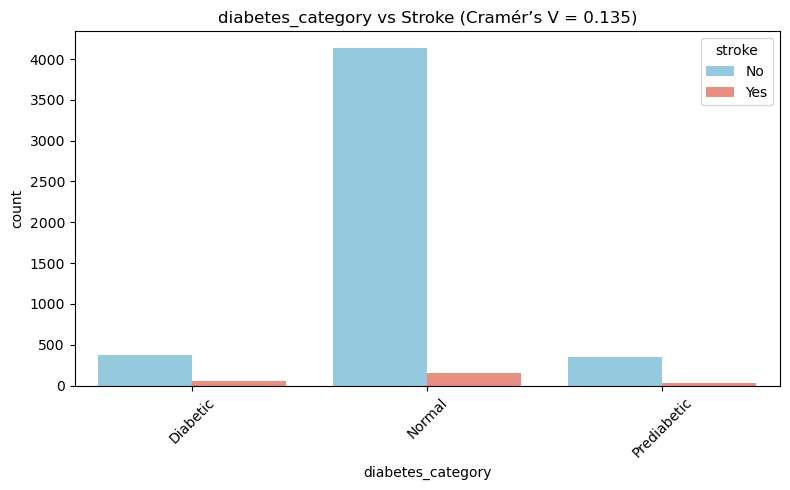

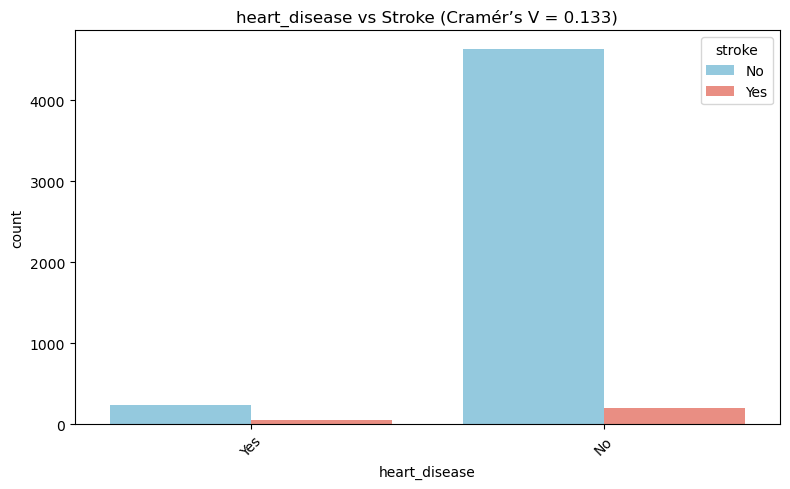

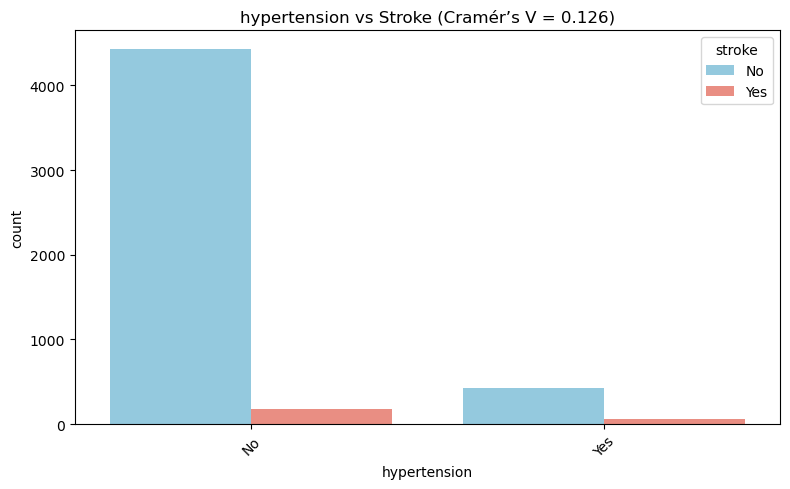

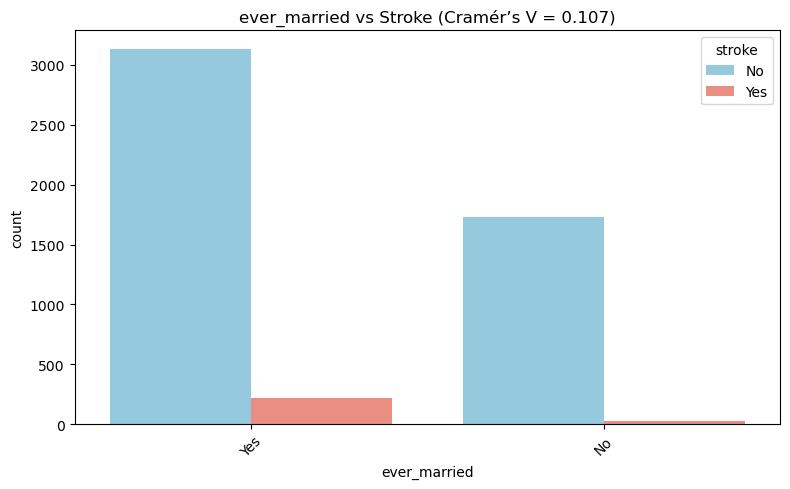

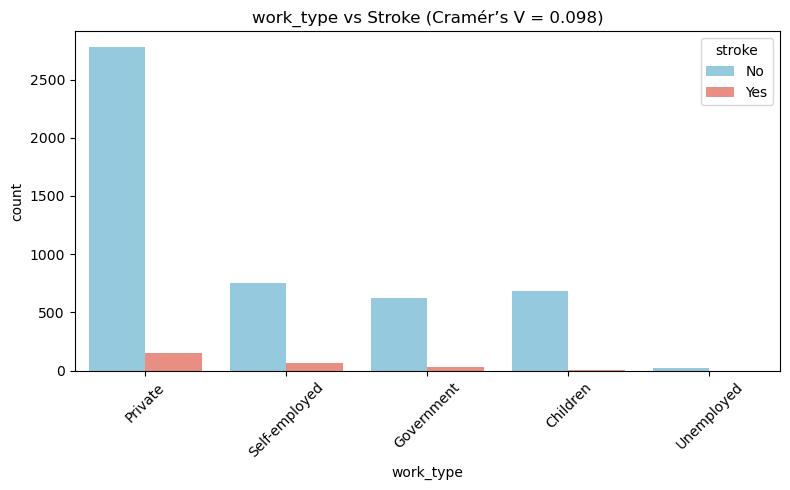

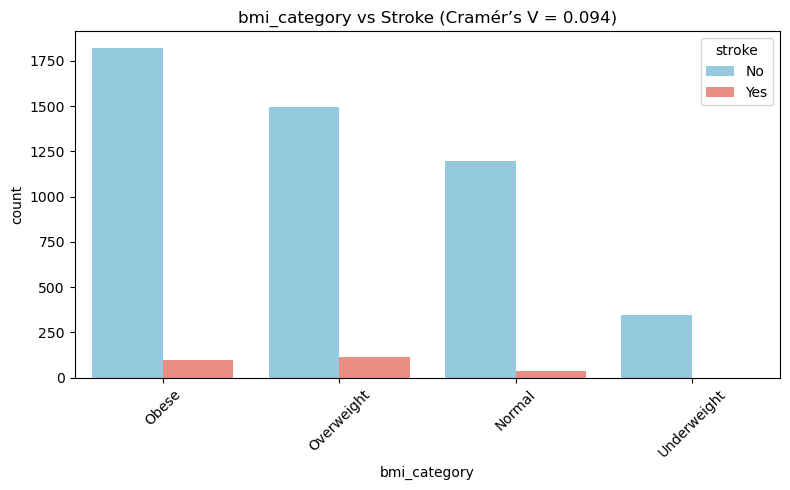

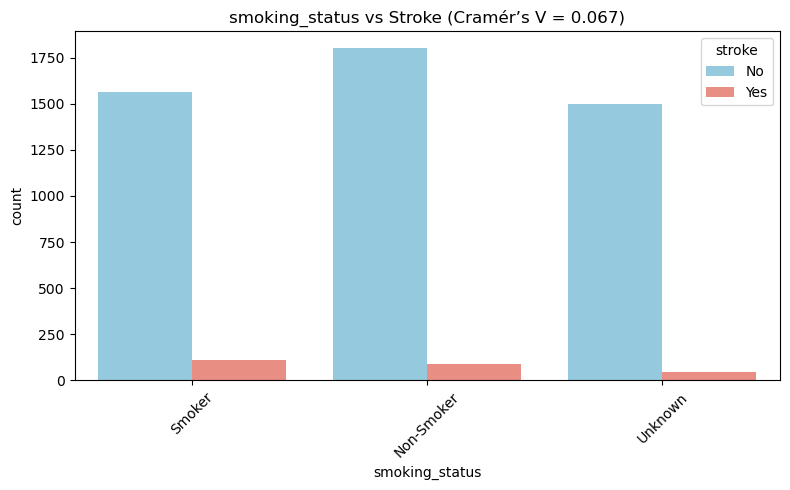

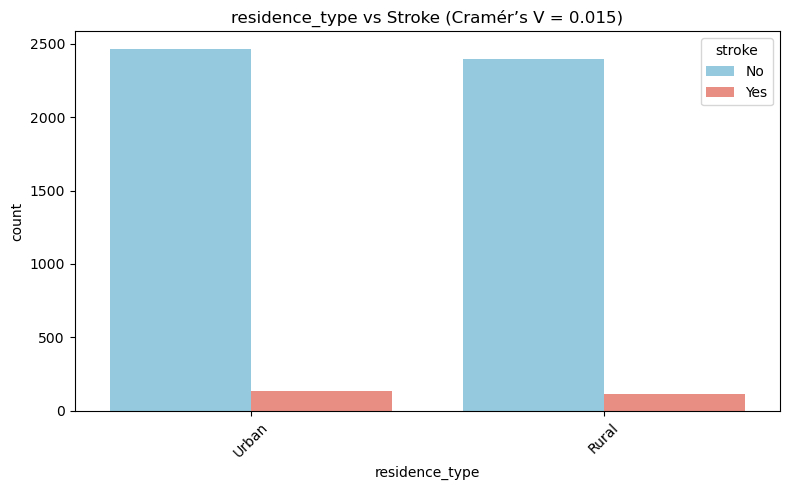

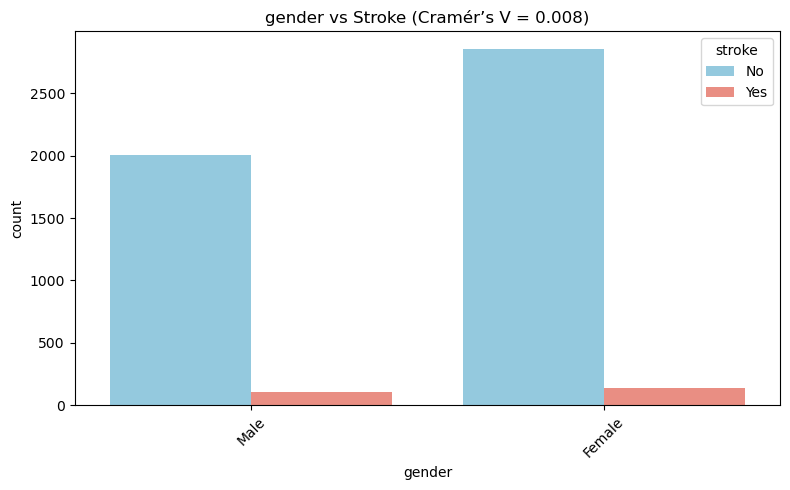

In [14]:
# ================================
# Cramér’s V: stroke vs categorical
# ================================
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd

def cramers_v(x, y):
    """Cramér’s V (uses chi2 internally; returns effect size only)."""
    table = pd.crosstab(x, y)
    chi2 = chi2_contingency(table)[0]
    n = table.to_numpy().sum()
    r, k = table.shape
    return np.sqrt((chi2 / n) / min(k - 1, r - 1))

# Ensure stroke labels are readable for plots
if data['stroke'].dtype != 'object':
    data['stroke'] = data['stroke'].map({0: 'No', 1: 'Yes'})

# 1) Collect and print Cramér’s V for all categorical features
v_scores = []
for col in categorical_cols:
    if col != 'stroke':
        v = cramers_v(data[col], data['stroke'])
        v_scores.append((col, v))

v_df = pd.DataFrame(v_scores, columns=['Feature', "Cramér's V"]).sort_values("Cramér's V", ascending=False)

print("\n=== Categorical features ranked by Cramér’s V (strength only) ===")
print(v_df.to_string(index=False))

# 2) Summary plot: strongest → weakest association with stroke
plt.figure(figsize=(8, 6))
sns.barplot(data=v_df, x="Cramér's V", y="Feature", palette="viridis")
plt.title("Cramér’s V with Stroke — Strongest to Weakest")
plt.xlabel("Cramér’s V (0–1)")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

# Show countplots for ALL categorical features
palette = {'No': 'skyblue', 'Yes': 'salmon'}

for col, v in v_df.itertuples(index=False):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=col, hue='stroke', hue_order=['No','Yes'], palette=palette)
    plt.title(f'{col} vs Stroke (Cramér’s V = {v:.3f})')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## <font color='red'>Step 10: EDA Multivariate Analysis</font>

### <font color='blue'>1. Target vs Numerical Features</font>

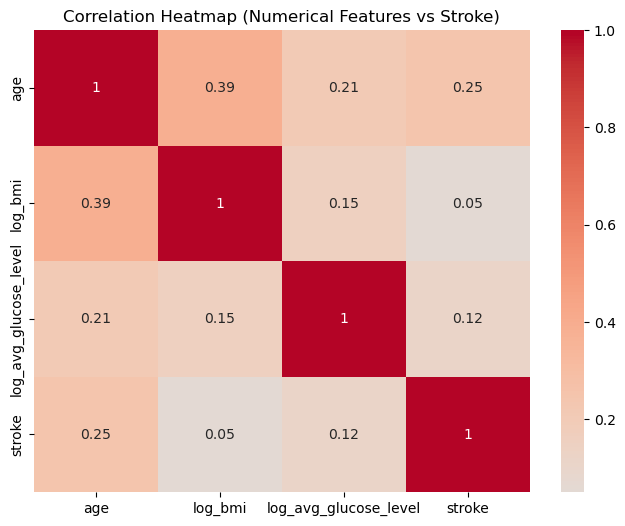

In [15]:
# Convert stroke to binary numeric (Yes=1, No=0)
data[target] = data[target].astype('category').cat.codes

# Create correlation matrix (numerical + target)
corr_matrix = data[numerical_cols + ['stroke']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Numerical Features vs Stroke)")
plt.show()

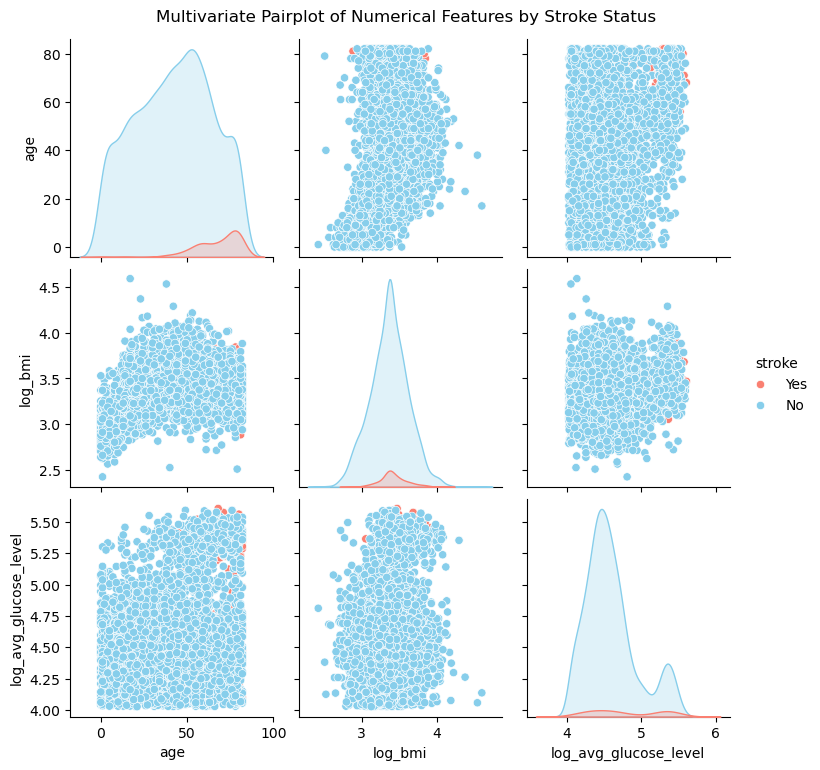

In [16]:
# Convert binary-coded stroke back to labels for visualization
data[target] = data[target].map({0: 'No', 1: 'Yes'})

# Create a pairplot to visualize relationships among numerical features with stroke
sns.pairplot(
    data=data,
    vars=numerical_cols,
    hue='stroke',
    palette={'No': 'skyblue', 'Yes': 'salmon'},
    diag_kind='kde'
)
plt.suptitle("Multivariate Pairplot of Numerical Features by Stroke Status", y=1.02)
plt.show()

### <font color='blue'>2. Target vs Categorical Features</font>

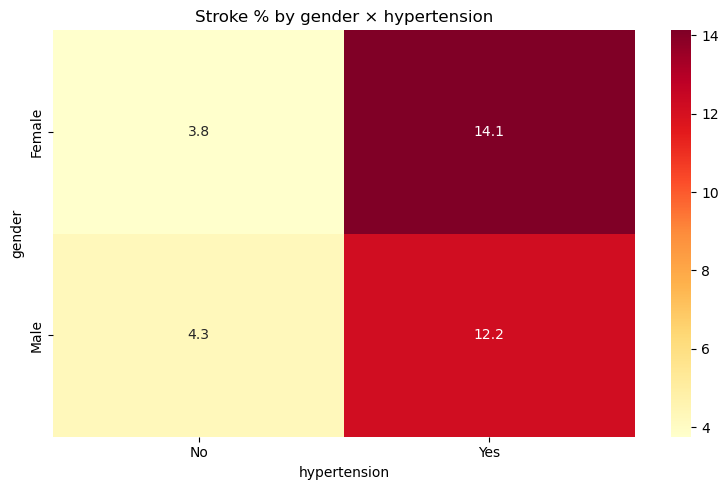

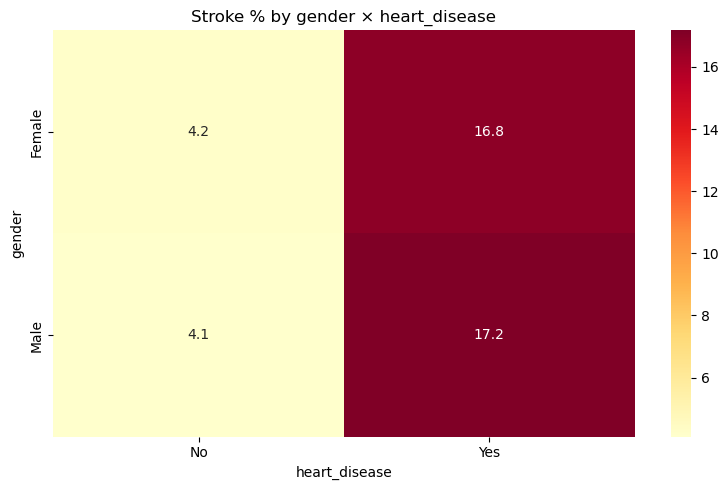

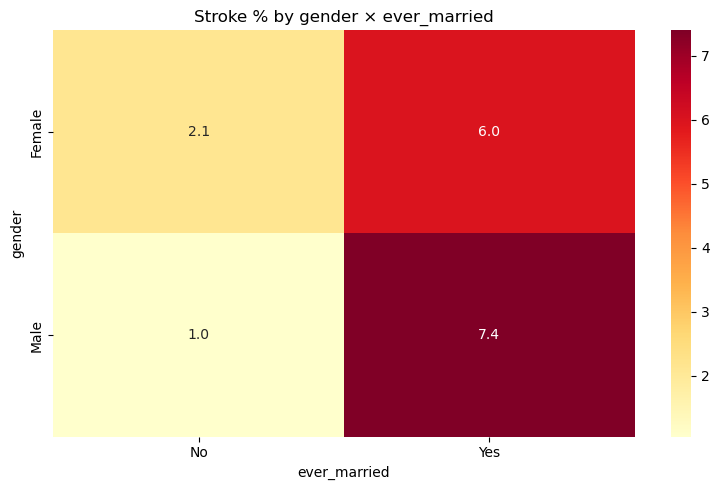

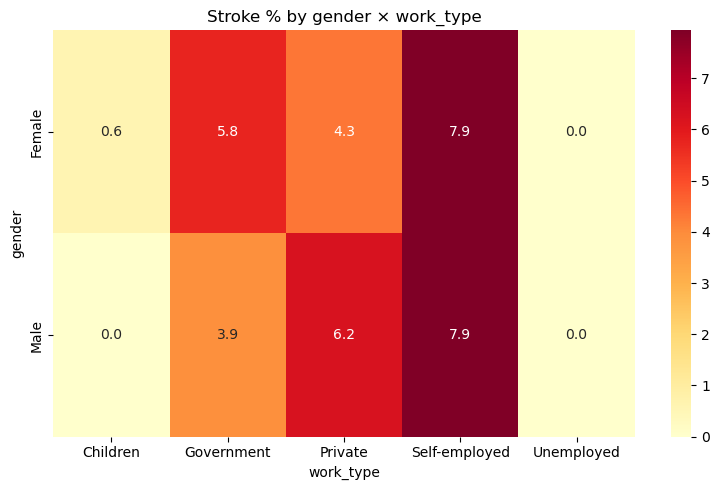

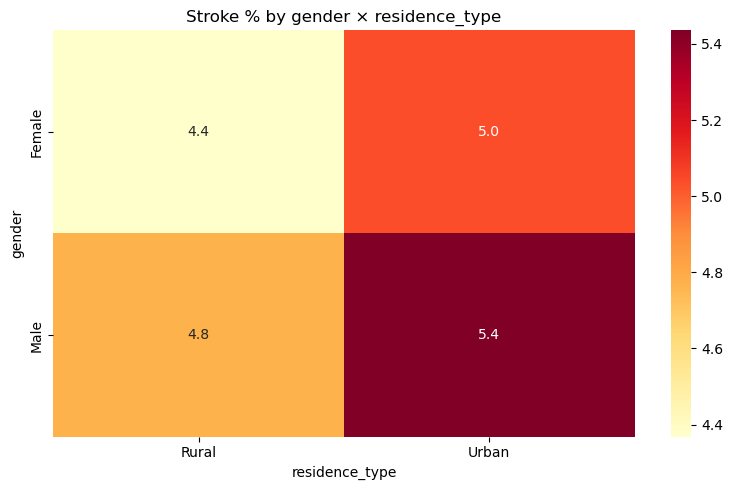

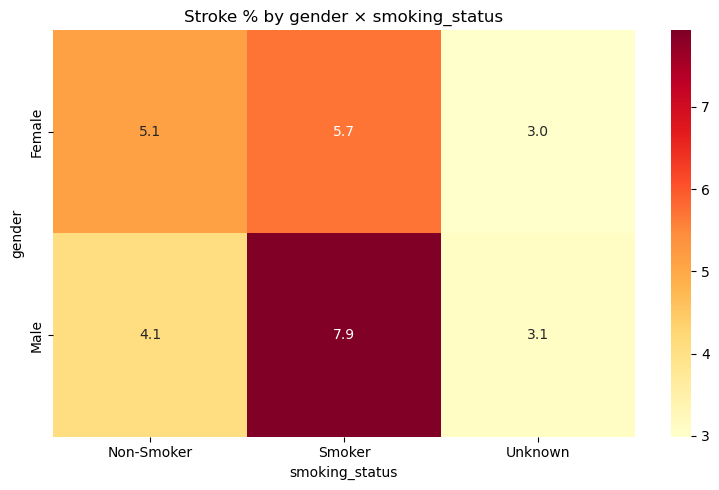

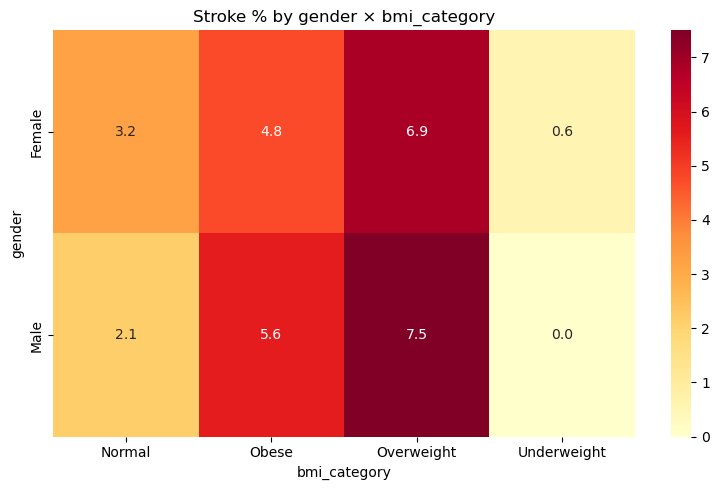

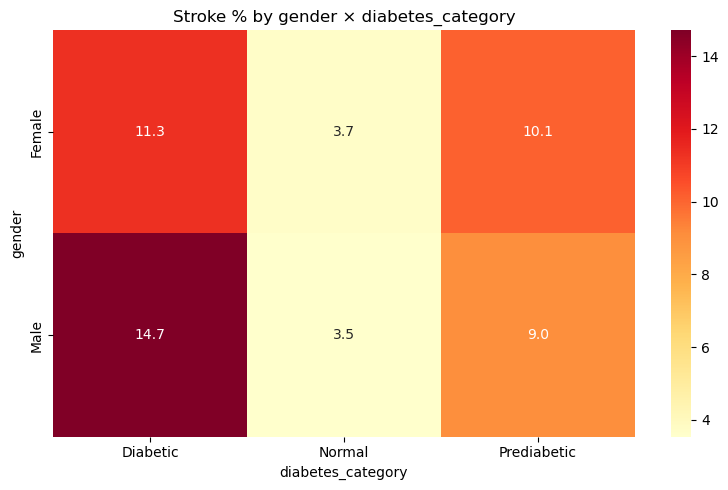

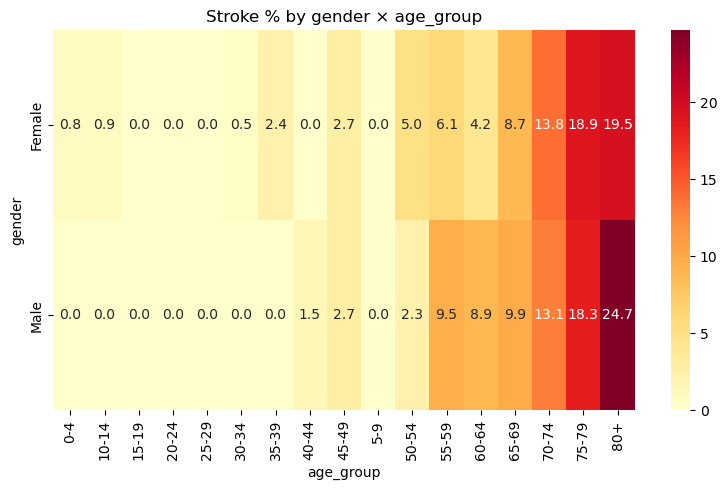

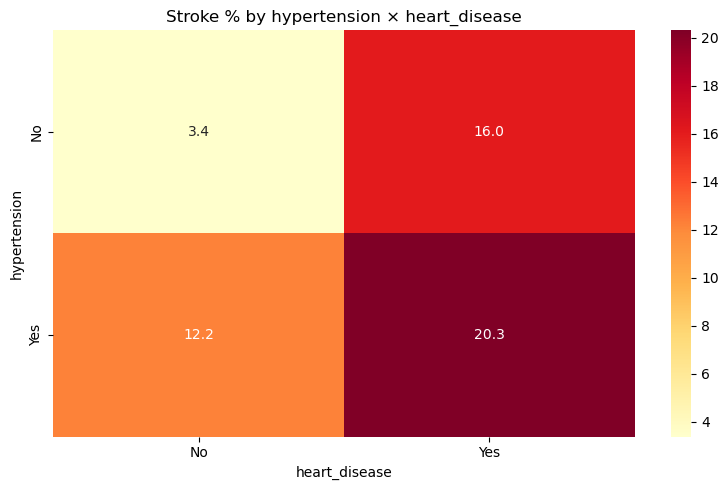

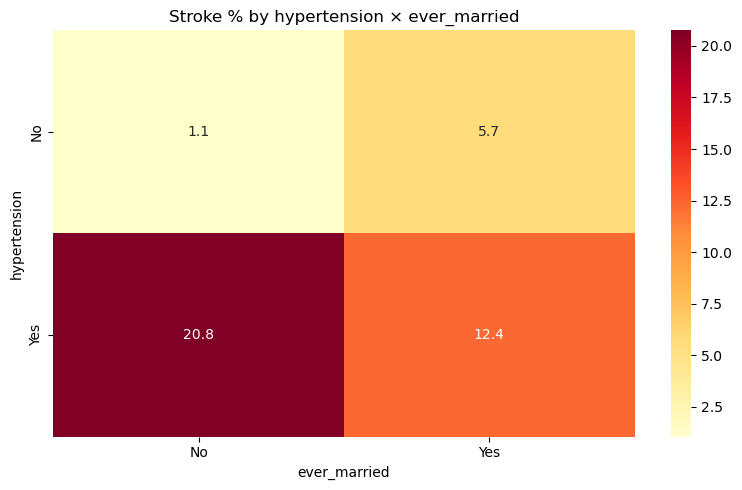

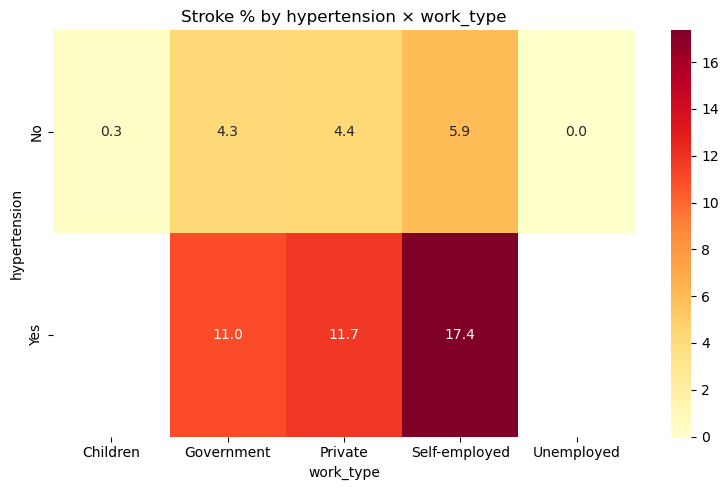

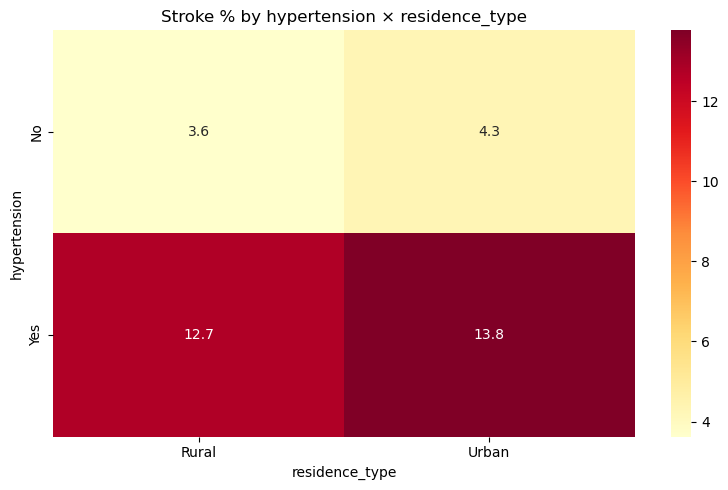

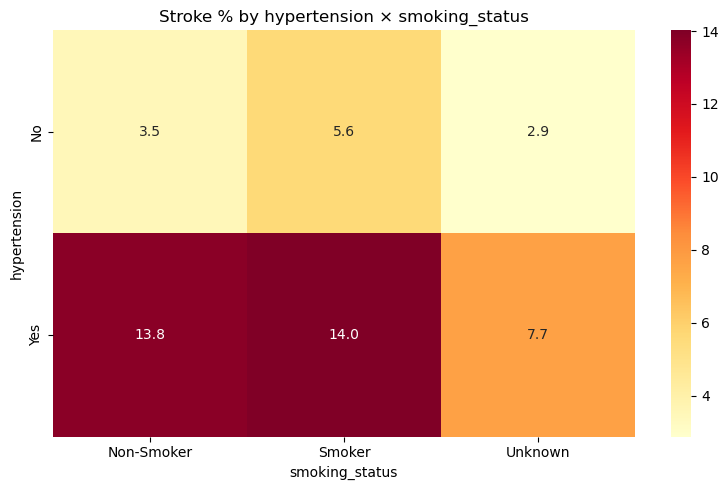

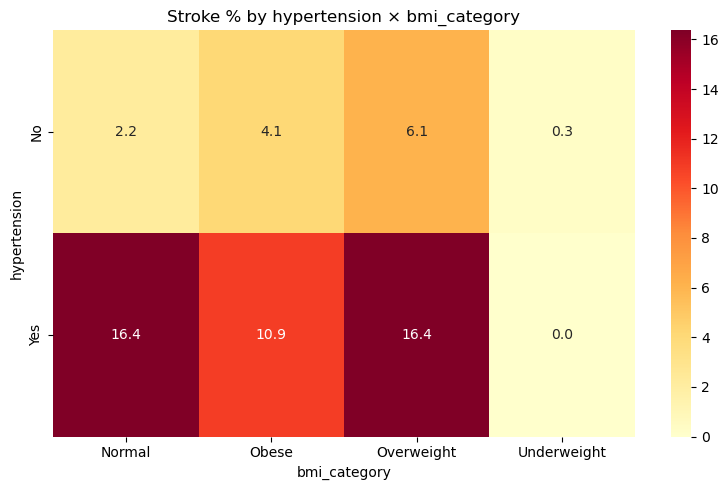

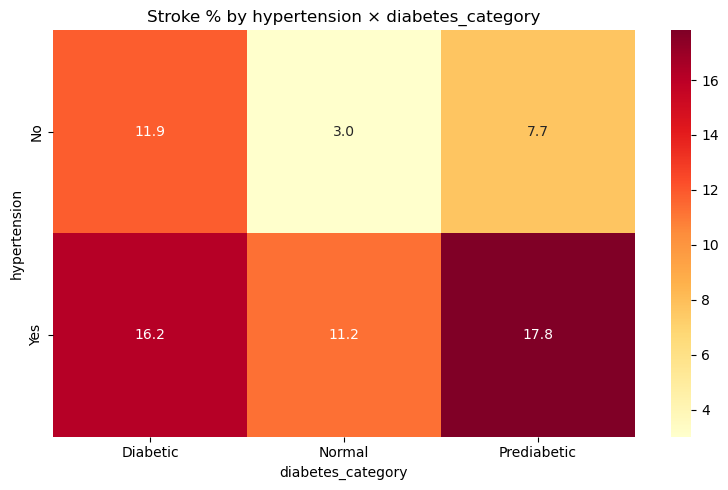

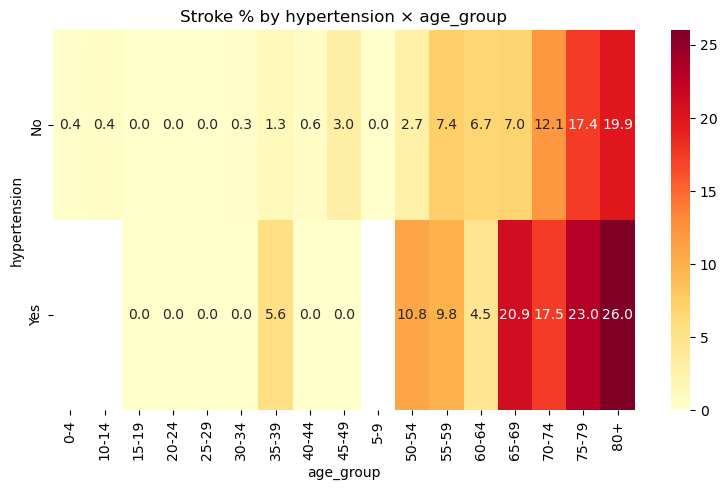

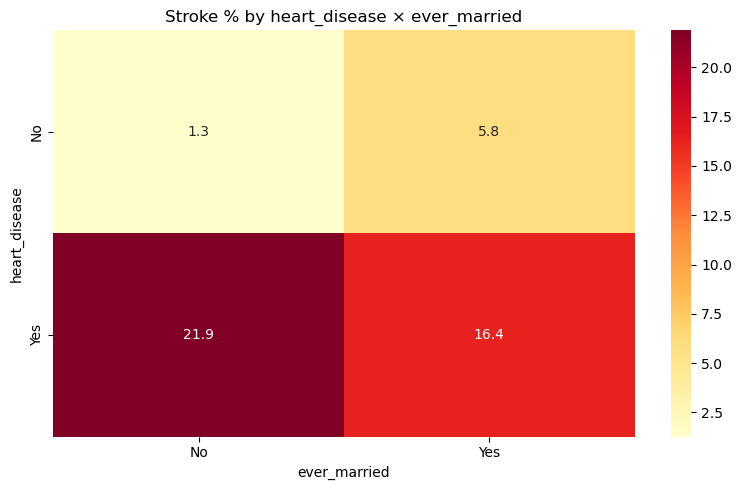

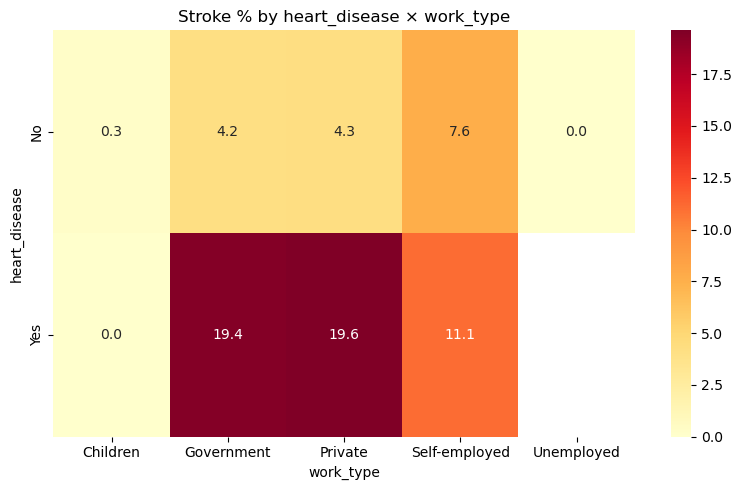

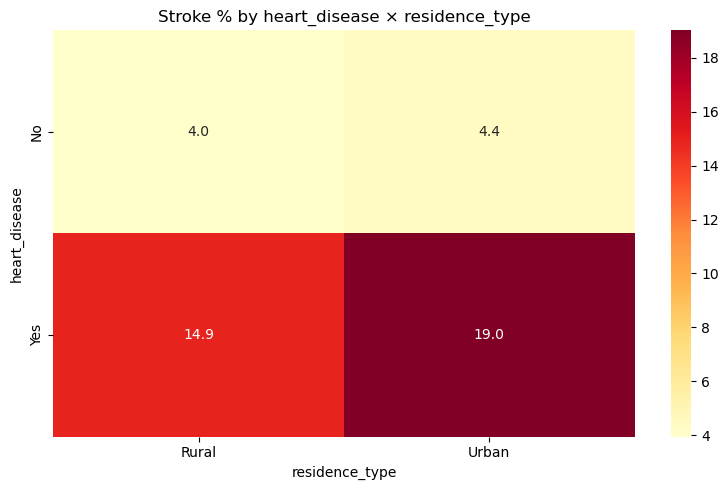

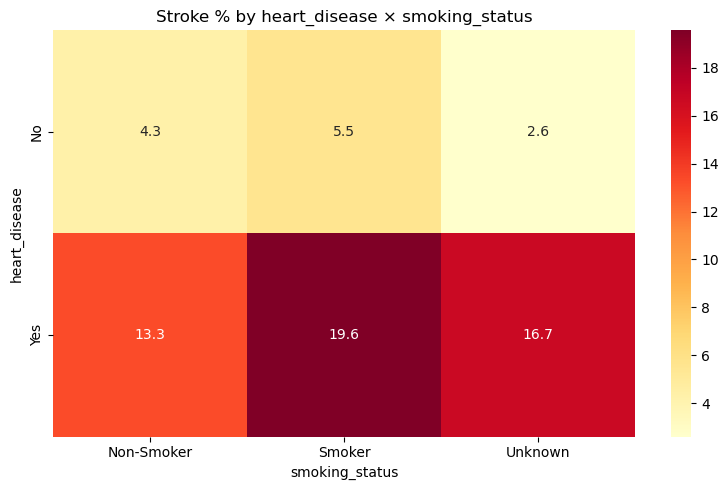

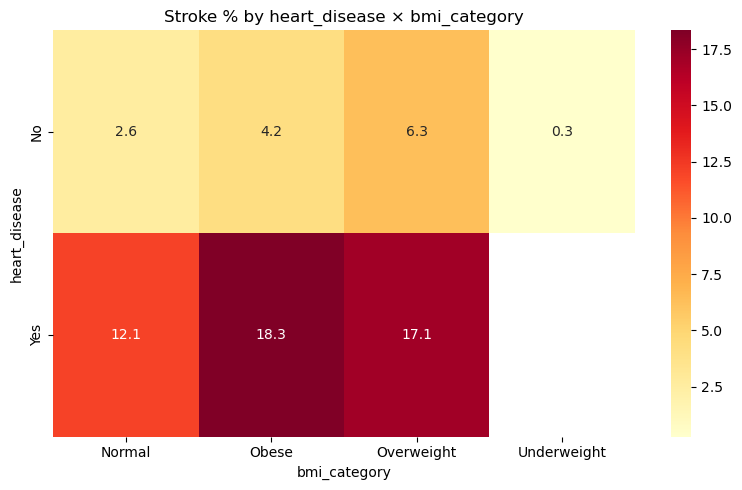

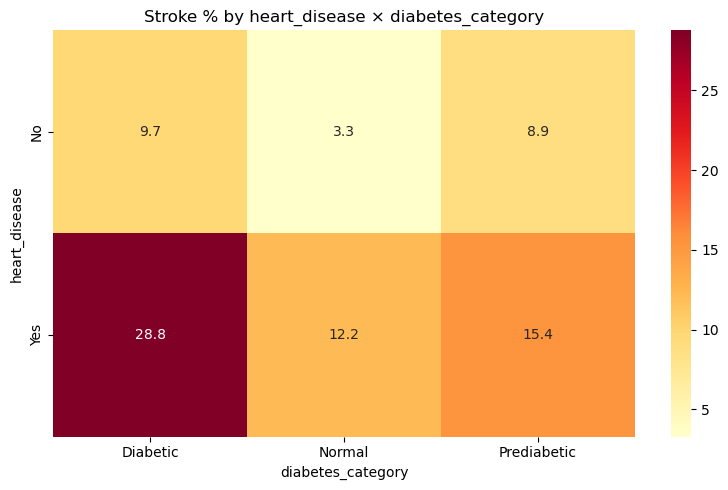

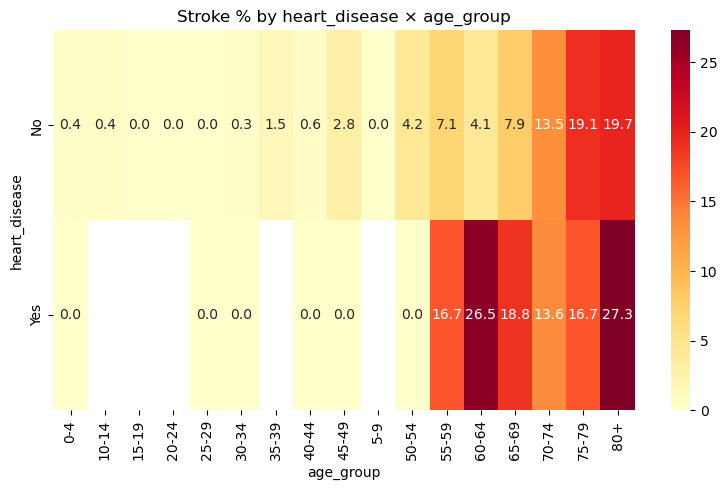

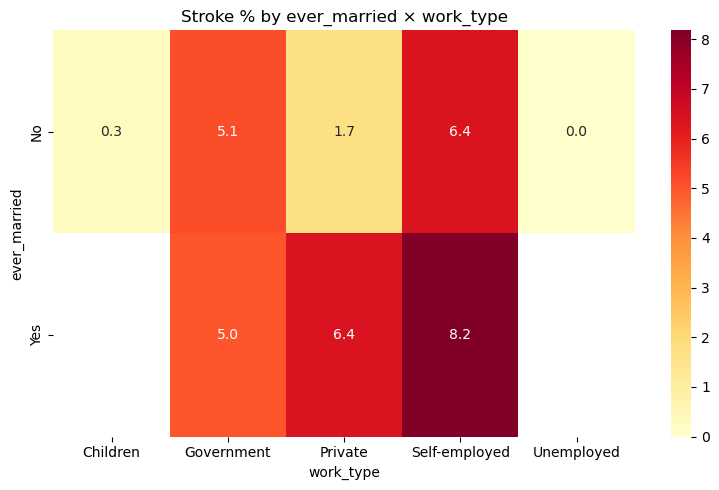

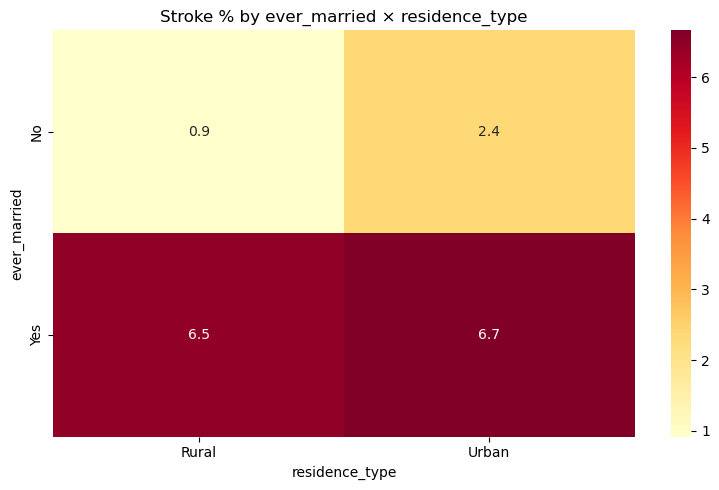

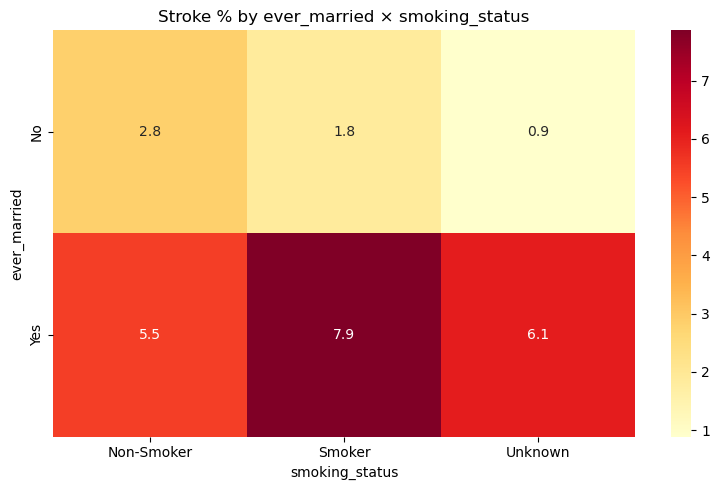

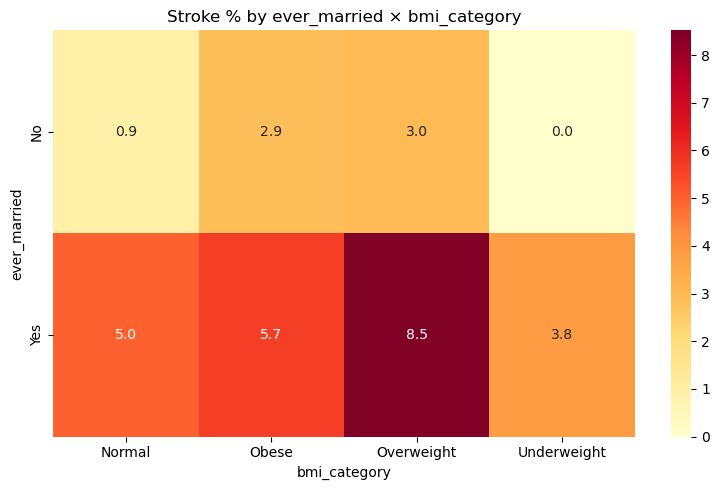

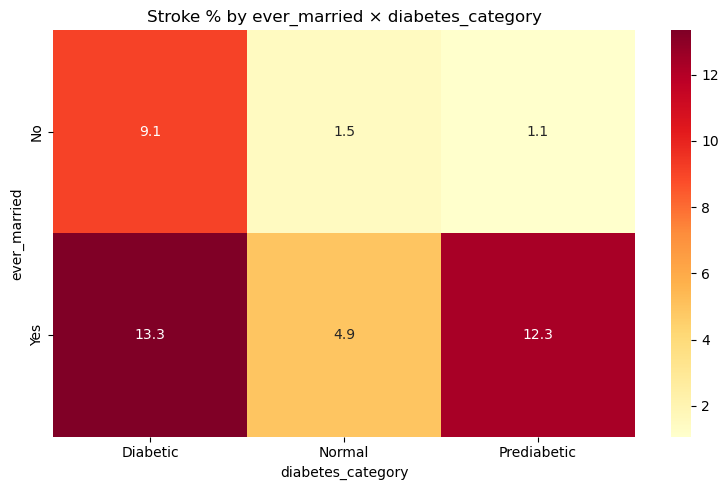

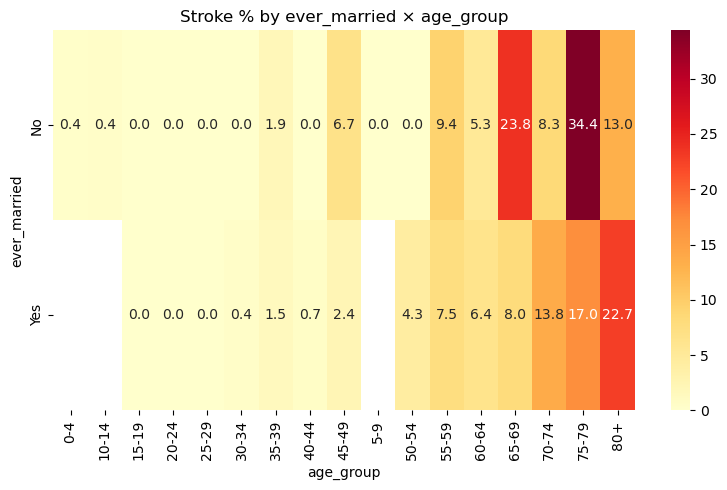

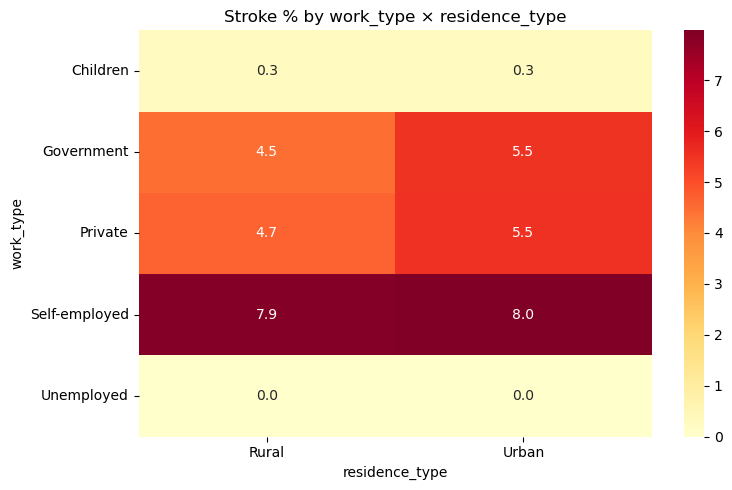

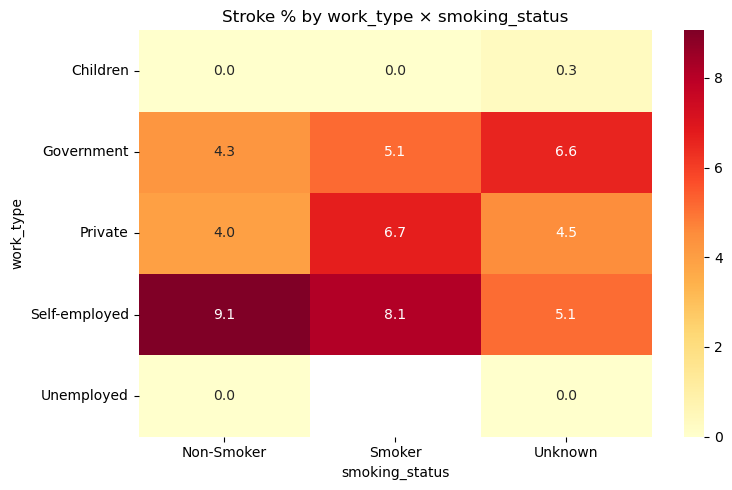

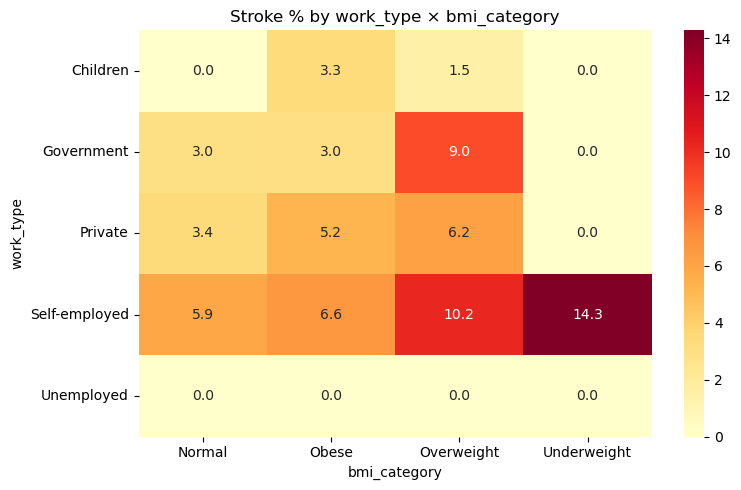

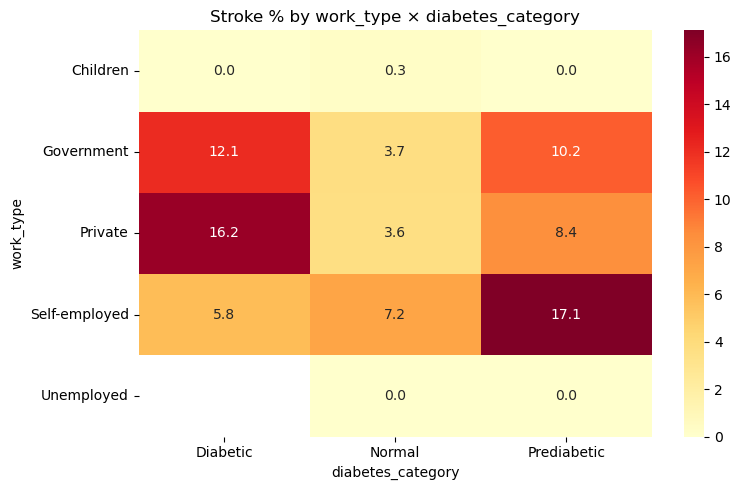

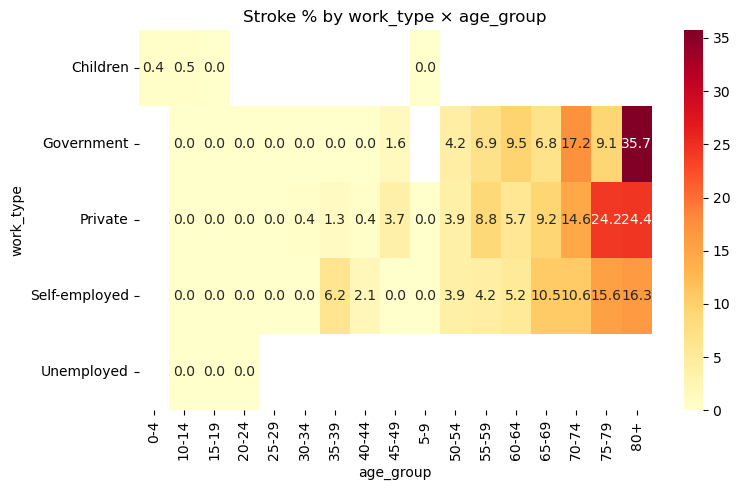

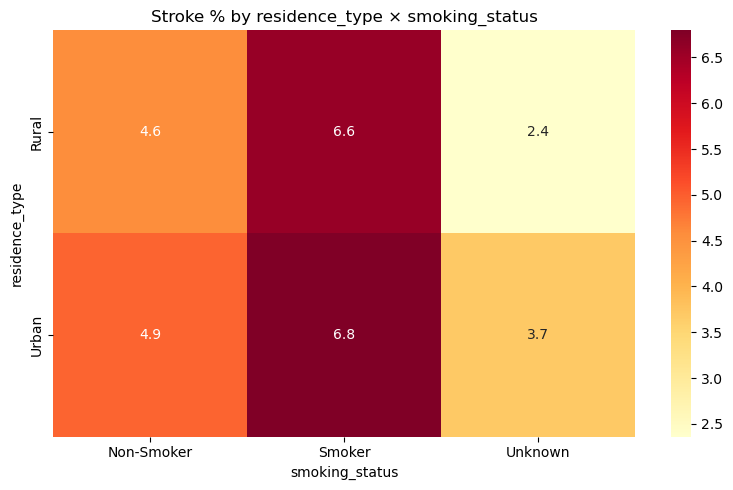

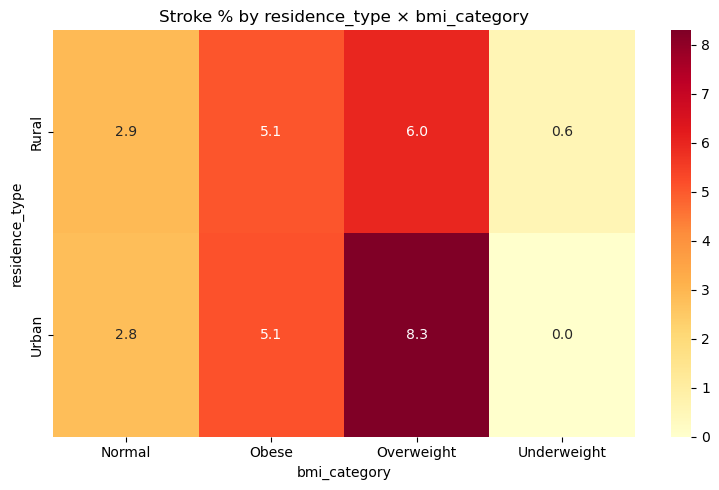

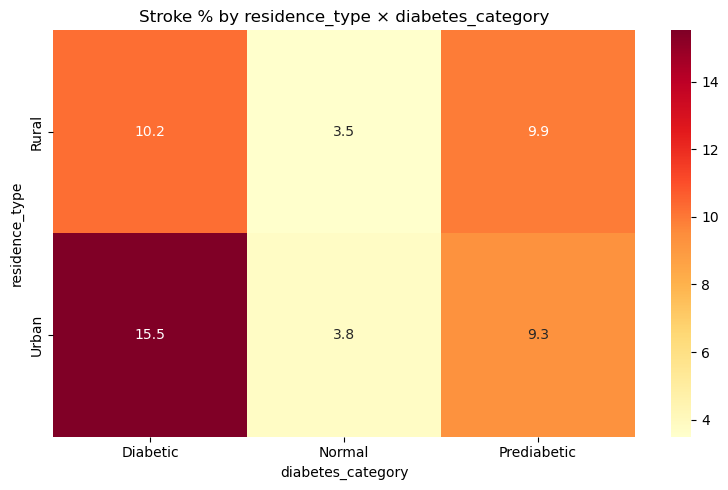

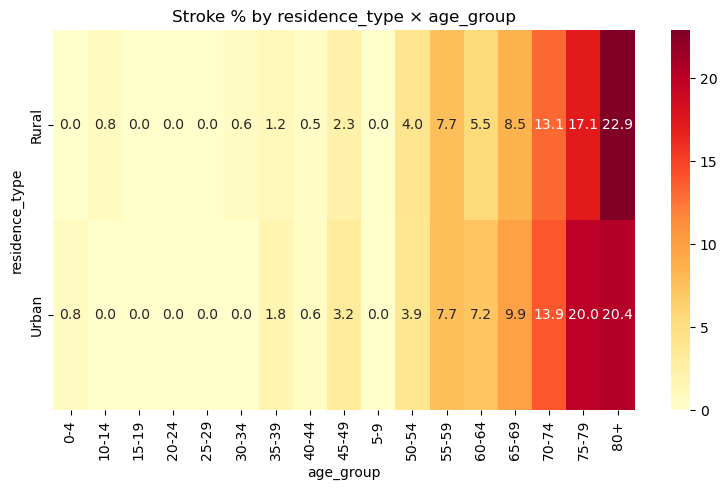

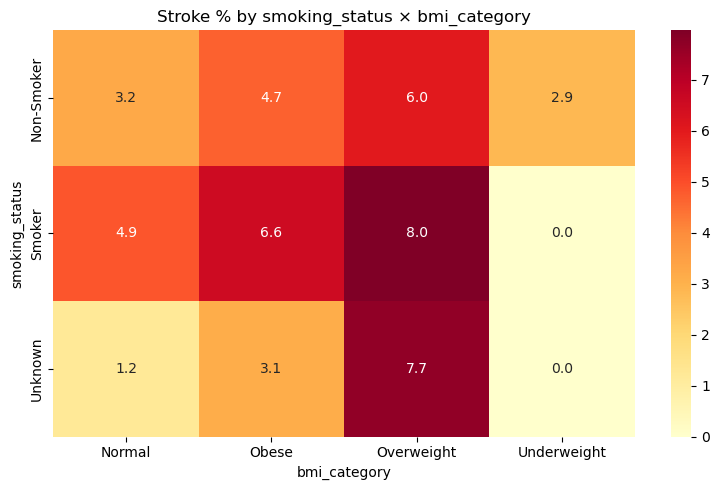

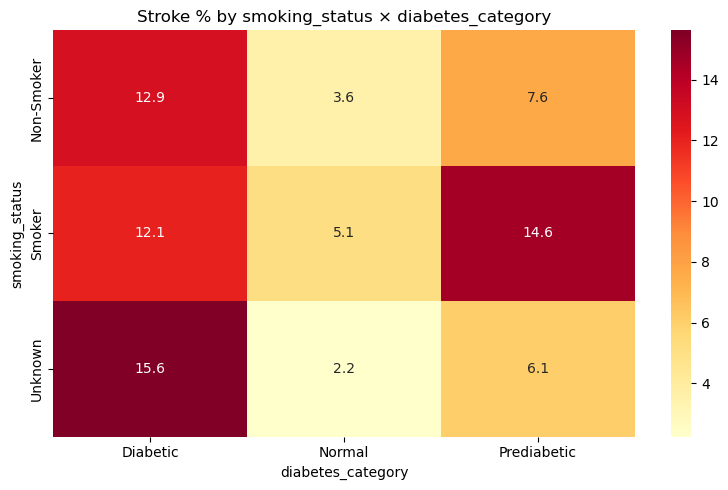

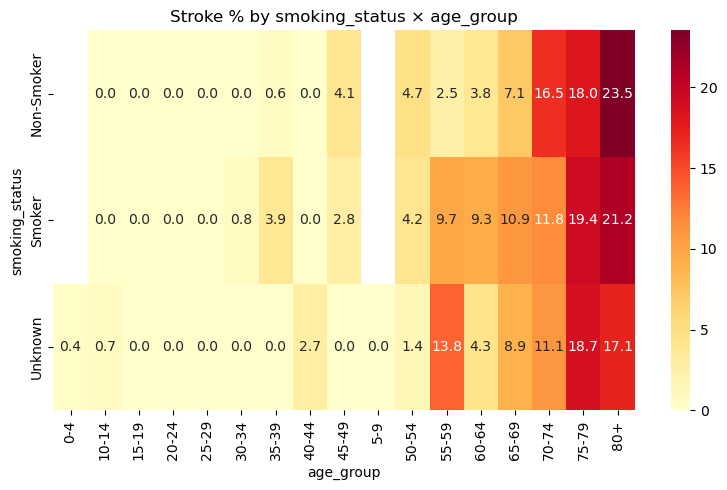

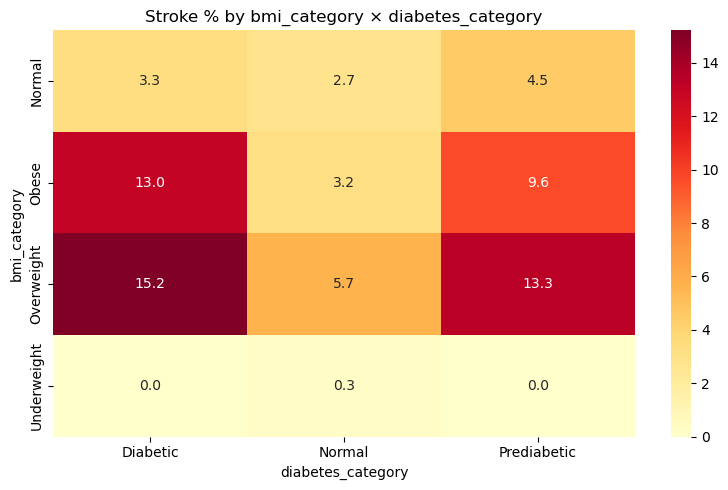

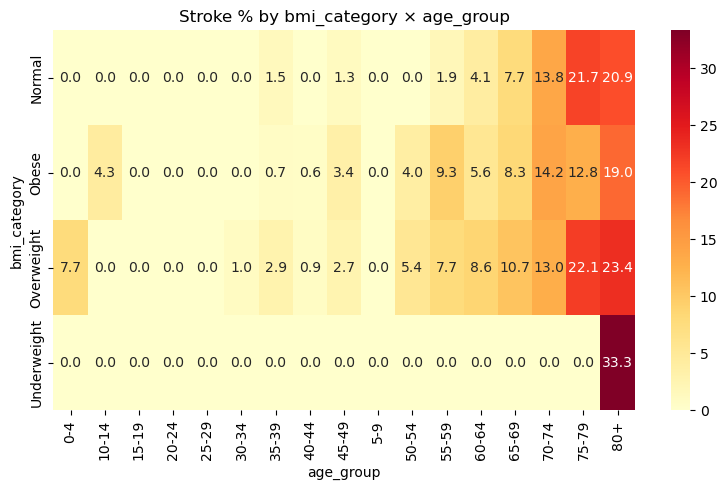

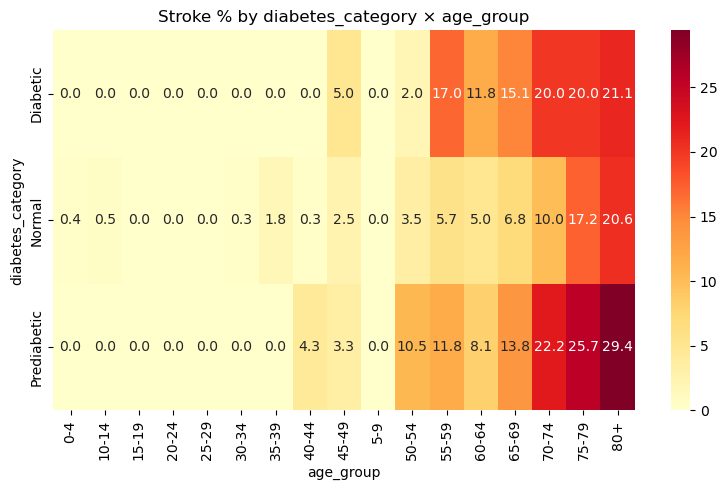

In [17]:
from itertools import combinations
cat_cols = [
    'gender','hypertension','heart_disease','ever_married','work_type',
    'residence_type','smoking_status','stroke','bmi_category','diabetes_category','age_group'
]

# Convert stroke to numeric so mean() gives stroke rate
stroke_num = data['stroke'].map({'No': 0, 'Yes': 1}).astype(float)

# Get categorical features except stroke (stroke will be used in values only)
cat_features = [col for col in cat_cols if col != 'stroke']

# Loop through all possible categorical pairs
for x_col, y_col in combinations(cat_features, 2):
    # Compute stroke % for each category combination
    cross = pd.crosstab(data[x_col], data[y_col], values=stroke_num, aggfunc='mean') * 100

    # Plot heatmap
    plt.figure(figsize=(8, 5))
    sns.heatmap(cross, annot=True, fmt=".1f", cmap="YlOrRd")
    plt.title(f"Stroke % by {x_col} × {y_col}")
    plt.xlabel(y_col)
    plt.ylabel(x_col)
    plt.tight_layout()
    plt.show()